First of all Let's try adding the essential libraries that we will use



In [97]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import kagglehub
import cv2
import os
from google.colab.patches import cv2_imshow
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, recall_score, roc_curve, auc, confusion_matrix, roc_auc_score, precision_score
from sklearn.preprocessing import StandardScaler, label_binarize
import sklearn.metrics as metrics
from sklearn.metrics import log_loss, hinge_loss, f1_score

Now, let's add the data to the project

In [4]:
path = kagglehub.dataset_download("sovitrath/diabetic-retinopathy-224x224-2019-data")

print("Path to dataset files:", path)

100%|██████████| 238M/238M [00:03<00:00, 78.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sovitrath/diabetic-retinopathy-224x224-2019-data/versions/4


In [51]:
for dirname, _, filenames in os.walk('/root/.cache/kagglehub/datasets/sovitrath/diabetic-retinopathy-224x224-2019-data/versions/4'):
    print(f"Directory: {dirname}")

    # Show up to 5 filenames
    for filename in filenames[:5]:
        print(f"    {filename}")

    # Print the total number of files in the directory
    print(f"    Total files: {len(filenames)}\n")


df = pd.read_csv('train.csv')
df.head()

Directory: /root/.cache/kagglehub/datasets/sovitrath/diabetic-retinopathy-224x224-2019-data/versions/4
    train.csv
    Total files: 1

Directory: /root/.cache/kagglehub/datasets/sovitrath/diabetic-retinopathy-224x224-2019-data/versions/4/colored_images
    Total files: 0

Directory: /root/.cache/kagglehub/datasets/sovitrath/diabetic-retinopathy-224x224-2019-data/versions/4/colored_images/Mild
    545df1bbcd61.png
    99ecdb41d5e7.png
    5b0e53f53ef3.png
    4029d70e9d8a.png
    93be637084a2.png
    Total files: 370

Directory: /root/.cache/kagglehub/datasets/sovitrath/diabetic-retinopathy-224x224-2019-data/versions/4/colored_images/Severe
    191a711852bd.png
    bf8092e4001d.png
    b5834ee64541.png
    069f43616fab.png
    537e50fdf22e.png
    Total files: 193

Directory: /root/.cache/kagglehub/datasets/sovitrath/diabetic-retinopathy-224x224-2019-data/versions/4/colored_images/No_DR
    52edbe29d655.png
    9a326446c431.png
    65cf00be6fb4.png
    f7e9fa75c7c1.png
    276b14f7232

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


Now let's extract the features and labels and resize the data and map the features and numbers according to this mapping: # 0 - No DR, # 1 - Mild # 2 - Moderate, # 3 - Severe, # 4 - Proliferative DR, and flatten the data to format for training

In [68]:
# Prepare lists for features and labels
features = []
labels = []
print(df["diagnosis"].value_counts())
# Image preprocessing and feature extraction
for _, row in df.iterrows():
    image_id = row['id_code']
    label = row['diagnosis']
    if label == 0:
        label = "No_DR"
    elif label == 1:
        label = "Mild"
    elif label == 2:
        label = "Moderate"
    elif label == 3:
        label = "Severe"
    elif label == 4:
        label = "Proliferate_DR"
    image_path = f"{image_id}.png"
    #print("image_path is", image_path)
    # Construct image path and load the image
    image_path = os.path.join(path, "colored_images",(label) ,image_path)
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is not None:
        # Resize the image to a fixed size (e.g., 64x64)
        resized_image = cv2.resize(image, (64, 64))

        # Flatten the image into a 1D feature vector
        feature_vector = resized_image.flatten()

        features.append(feature_vector)
        labels.append(label)
print(pd.DataFrame(labels).value_counts())
# Convert to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Normalize the features
scaler = StandardScaler()
features = scaler.fit_transform(features)



diagnosis
0    1805
2     999
1     370
4     295
3     193
Name: count, dtype: int64
0             
No_DR             1805
Moderate           999
Mild               370
Proliferate_DR     295
Severe             193
Name: count, dtype: int64


After that let's split the data into training and testing and use SVM classification model

In [69]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, stratify=labels, random_state=4)

Let's Use a very famous algorithm for classification which is SVM (Support Vector Machine)


In [70]:
svm = SVC(kernel='sigmoid', C=1.0)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5770804911323328


Another very famous Classification model is KNN, so let's try that too, and plot the accuracy of each, and plot the loss curve too "Log Loss"

k= 1 accuracy= 0.7066848567530696
k= 2 accuracy= 0.6821282401091405
k= 3 accuracy= 0.7216916780354706
k= 4 accuracy= 0.7148703956343793
k= 5 accuracy= 0.7407912687585266
k= 6 accuracy= 0.7353342428376535
k= 7 accuracy= 0.7339699863574352
k= 8 accuracy= 0.7339699863574352
k= 9 accuracy= 0.732605729877217


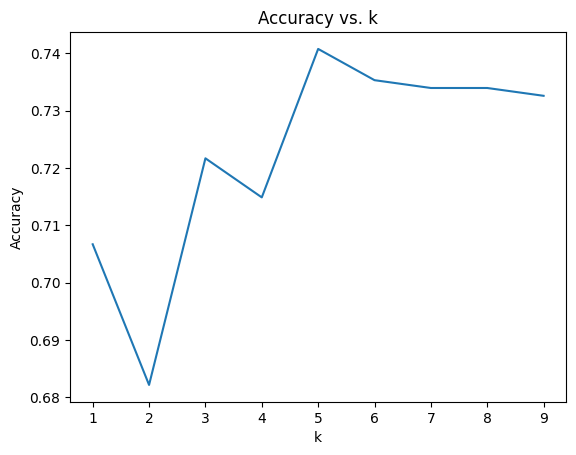

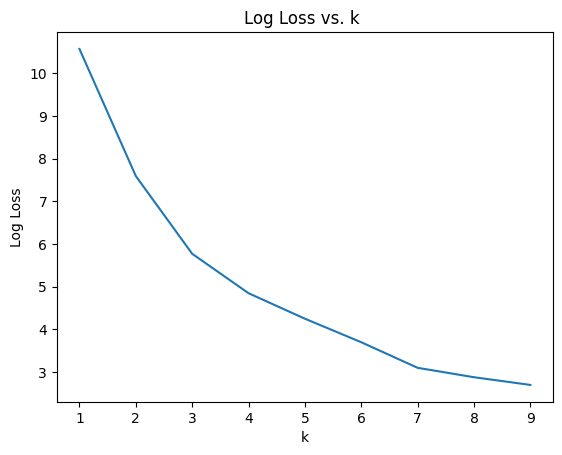

In [71]:
from sklearn.neighbors import KNeighborsClassifier

k_accuracies = []
knn_log_losses = []
knn_predections = []
for k in range(1, 10):
    KNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    KNN_yhat = KNN_model.predict(X_test)
    knn_predections.append(KNN_yhat)
    print("k=", k, "accuracy=", accuracy_score(y_test, KNN_yhat))
    k_accuracies.append(accuracy_score(y_test, KNN_yhat))
    knn_log_losses.append(log_loss(y_test, KNN_model.predict_proba(X_test)))

plt.plot(range(1, 10), k_accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. k")
plt.show()

plt.plot(range(1, 10), knn_log_losses)
plt.xlabel("k")
plt.ylabel("Log Loss")
plt.title("Log Loss vs. k ")
plt.show()

Decision Tree Classifier is among the best classification algorithms, let's see if it's preformance matches KNN

In [72]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier()
Tree.fit(X_train,y_train)
Tree_predictions = Tree.predict(X_test)
Tree_Accuracy_Score = metrics.accuracy_score(y_test, Tree_predictions)
print(Tree_Accuracy_Score)

0.6725784447476125


DTC didn't meet our expectations, since we got the attempt to tune the parameters of KNN, let's try train using Logistic Regression iteratively in attempt to boost the performance of the model, and plot the loss curve for it

Epoch 1/10: Log Loss = 0.7080, Accuracy = 0.7503
Epoch 2/10: Log Loss = 0.7067, Accuracy = 0.7490
Epoch 3/10: Log Loss = 0.7077, Accuracy = 0.7490
Epoch 4/10: Log Loss = 0.7089, Accuracy = 0.7544
Epoch 5/10: Log Loss = 0.7067, Accuracy = 0.7476
Epoch 6/10: Log Loss = 0.7076, Accuracy = 0.7503
Epoch 7/10: Log Loss = 0.7105, Accuracy = 0.7517
Epoch 8/10: Log Loss = 0.7082, Accuracy = 0.7476
Epoch 9/10: Log Loss = 0.7087, Accuracy = 0.7544
Epoch 10/10: Log Loss = 0.7062, Accuracy = 0.7531


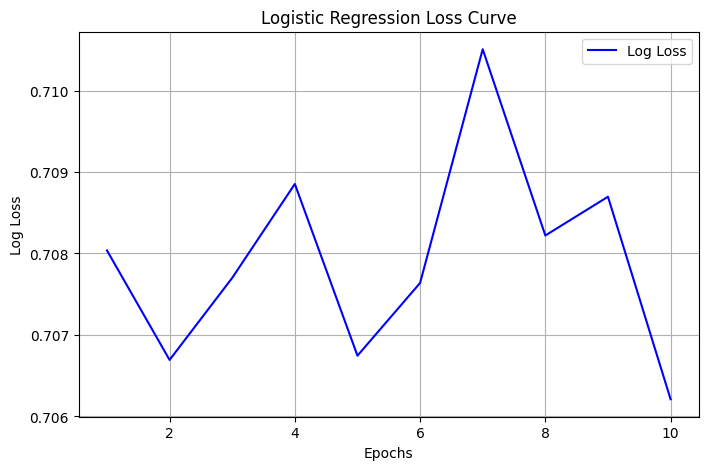

In [99]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
LR_losses = []
LR_accuracies = []
LR_proba = []
LR_predections = []
recall_scores = []
precision_scores = []
f1_scores = []
LR = LogisticRegression(solver = "saga", penalty = 'l2', max_iter=10).fit(X_train,y_train)
num_epochs = 10  # Number of iterations/epochs
for epoch in range(num_epochs):
    # Train on training data
    LR.fit(X_train, y_train)

    # Predict probabilities for log loss calculation
    y_pred_proba = LR.predict_proba(X_test)
    LR_proba.append(y_pred_proba)
    # Predict labels for accuracy calculation
    y_pred = LR.predict(X_test)
    LR_predections.append(y_pred)
    precision_scores.append(precision_score(y_test, y_pred, average="macro"))
    recall_scores.append(recall_score(y_test, y_pred, average="macro"))
    f1_scores.append(f1_score(y_test, y_pred, average="macro"))
    # ROC curve

    # Calculate log loss and accuracy
    loss = log_loss(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    LR_losses.append(loss)
    LR_accuracies.append(accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}: Log Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")

# Plot the Loss Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), LR_losses, label="Log Loss", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Log Loss")
plt.title("Logistic Regression Loss Curve")
plt.legend()
plt.grid()
plt.show()

Since the highest performace was in LR at epoch number 4 "Least Loss and Highest Accuracy", this is the one we will evaluate in ROC curve, AUC score, recall score, precision score, and confusion matrix

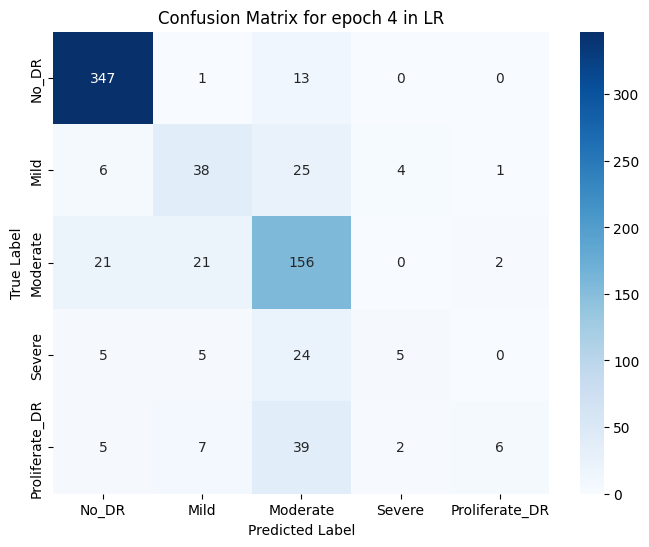

In [100]:
import seaborn as sns
#1 confusion matrix
# Mapping for numerical labels to their string equivalents
label_mapping = {
    0: "No_DR",
    1: "Mild",
    2: "Moderate",
    3: "Severe",
    4: "Proliferate_DR"
}

# Ensure predictions correspond to the 4th k value (index 5 in your list)
LR_value_predictions = LR_predections[9]
LR_predict_proba = LR_proba[9]
# Create a confusion matrix with all possible labels
cm = confusion_matrix(y_test, LR_value_predictions, labels=["No_DR", "Mild", "Moderate", "Severe", "Proliferate_DR"])

# Relabel the confusion matrix with the string labels
class_labels = [label_mapping[i] for i in range(5)]

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for epoch 4 in LR")
plt.show()

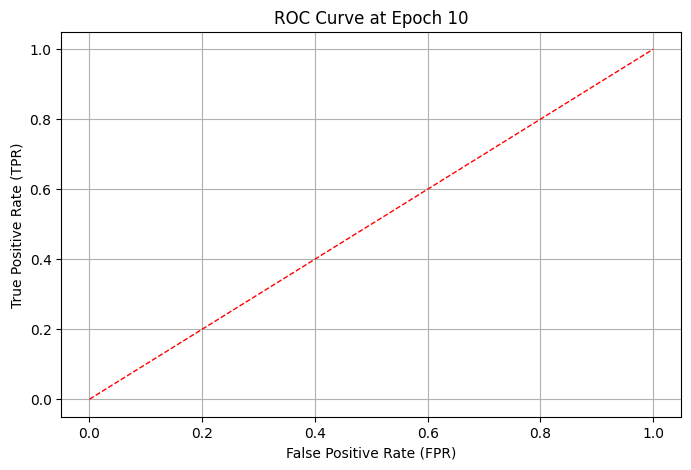

Precision = 0.6319, Recall = 0.4969


In [105]:
precision_at_epoch = precision_score(y_test, LR_value_predictions, average="macro")
recall_at_epoch = recall_score(y_test, LR_value_predictions, average="macro")
# ROC curve
fpr, tpr, _ = roc_curve(y_test, LR_predict_proba[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)


if fpr is not None and tpr is not None:
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=1)  # Random classifier line
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title(f"ROC Curve at Epoch 10")
    plt.grid()
    plt.show()


print(f"Precision = {precision_at_epoch:.4f}, Recall = {recall_at_epoch:.4f}")

Let's plot the metrics we calculated F1 Scores, Precision Scores and Recall Scores

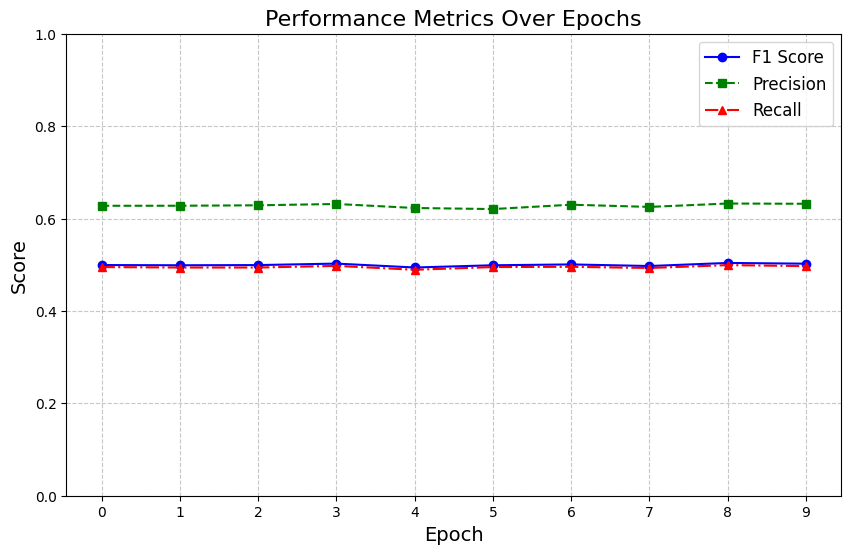

In [111]:
plt.figure(figsize=(10, 6))
epochs = range(0, 10)
# Plot each metric
plt.plot(epochs, f1_scores, label='F1 Score', marker='o', linestyle='-', color='blue')
plt.plot(epochs, precision_scores, label='Precision', marker='s', linestyle='--', color='green')
plt.plot(epochs, recall_scores, label='Recall', marker='^', linestyle='-.', color='red')

# Add titles and labels
plt.title('Performance Metrics Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Score', fontsize=14)

# Customize the plot
plt.xticks(epochs)  # Set x-axis ticks to epochs
plt.ylim(0.0, 1.0)  # Assuming scores range from 0 to 1
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid for better readability

# Add a legend
plt.legend(fontsize=12)

# Display the plot
plt.show()